In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
df = pd.read_csv('../data/vocab.csv')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


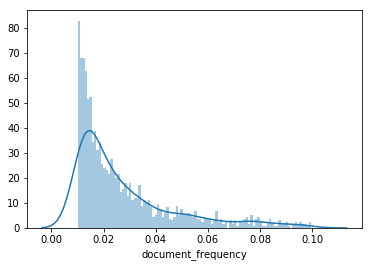

In [4]:
minVocabFreq = 0.01
maxVocabFreq = 0.1
sns.distplot(df[df['document_frequency'] > minVocabFreq][df['document_frequency'] < maxVocabFreq].document_frequency, 
             bins = 100)
plt.show()